## Pandas 특징 

• 구조화된 데이터에 적합

• 이형의 컬럼을 갖는 테이블 자료 처리 

• 시계열 형식의 자료 처리에 적합

• 통계적 데이터 처리 기능을 제공 



## Pandas를 사용한 데이터분석



•	Reading Data From CSV, CSV에서 자료 읽기

•	Understanding the characteristics of  Data Frames, 데이터 프레임의 주요 특징을 이해한다

•	Formatting, cleaning and filtering Data Frames, 데이터 프레임 포멧팅, 정재(cleaning) 및 필터링 

•	Group-by and Merge, 자료의 그룹핑 및 자료 통합

•	Plotting, 주요자료에 대한 플롯팅 



[참고자료] 

https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-movies-on-streaming-platforms-5ea494fee9d2

https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("669193_1178490_compressed_MoviesOnStreamingPlatforms_updated.csv.zip")

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

“Unnamed: 0” 와 “ID” 컬럼은 중복으로 해상 컬럼은 데이터프레임에서 제외시킴 

In [4]:
df.drop(["Unnamed: 0", "ID", "Type"], axis=1, inplace=True)

In [5]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


데이테의 전체 자료 이해하기 : 16k 행 and 14 열, NA 값 정보 얻기

In [6]:
df.shape

(16744, 14)

In [7]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

전체 자료의  9% 의 행이 제거됨, 결측자료가 없음

In [8]:
# 열
df.drop(['Age', 'Rotten Tomatoes'], axis=1, inplace=True)
#행 
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum().sum()

Title          0
Year           0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

장르 컬럼으로 그룹핑함

In [9]:
group_by_genres = df.groupby(by=['Genres'])
genres_count = group_by_genres.count()
genres_count_series = genres_count.iloc[:,0]
genres_count_series

Genres
Action                                                                 137
Action,Adventure                                                        46
Action,Adventure,Biography                                               3
Action,Adventure,Biography,Drama,History                                 3
Action,Adventure,Biography,Drama,Romance                                 1
Action,Adventure,Comedy                                                 19
Action,Adventure,Comedy,Crime                                            9
Action,Adventure,Comedy,Crime,Drama,Romance                              1
Action,Adventure,Comedy,Crime,Drama,Thriller                             2
Action,Adventure,Comedy,Crime,Family                                     2
Action,Adventure,Comedy,Crime,Family,Mystery                             2
Action,Adventure,Comedy,Crime,Family,Mystery,Sci-Fi                      1
Action,Adventure,Comedy,Crime,Family,Romance,Sport                       1
Action,Adventure,C

In [10]:
genres_count_series.shape

(1824,)

주요장르에 대해 결과를 플롯팅함

In [11]:
genres_sort = genres_count_series.sort_values(ascending=False).head(8)
genres_sort

Genres
Drama                   1225
Documentary             1034
Comedy                   905
Comedy,Drama             428
Horror                   420
Drama,Romance            381
Comedy,Drama,Romance     322
Horror,Thriller          292
Name: Title, dtype: int64

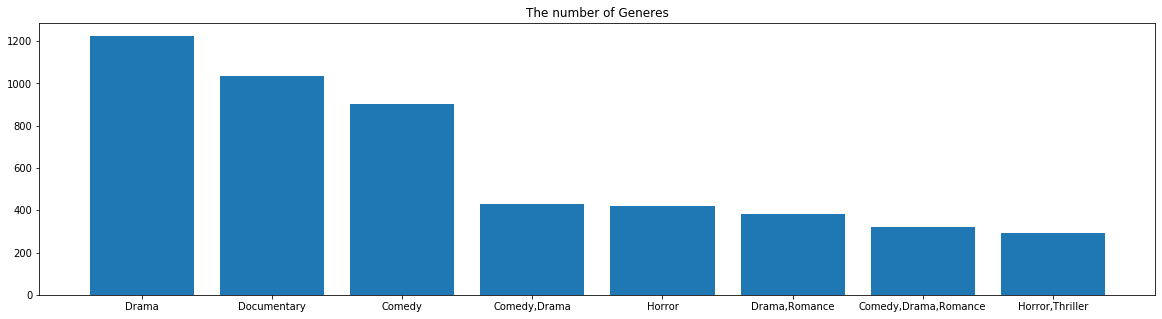

In [33]:
from matplotlib import pyplot as plt
    
plt.figure(figsize=(20,5))
plt.bar(genres_sort.index, genres_sort)
plt.title('The number of Generes')
plt.show()

10대 최상위 장르

In [13]:
most_genres = df.groupby('Genres').size().sort_values(ascending=False)[:10]

In [14]:
most_genres.head(10)

Genres
Drama                   1225
Documentary             1034
Comedy                   905
Comedy,Drama             428
Horror                   420
Drama,Romance            381
Comedy,Drama,Romance     322
Horror,Thriller          292
Comedy,Romance           277
Drama,Thriller           213
dtype: int64

연도별 영화 출시

In [35]:
movie_stats = df.groupby('Year').agg({'Year': [np.size]})
movie_stats.tail(5)

,Year
,size
Year,
2016,1059
2017,1244
2018,1055
2019,592
2020,111


In [16]:
movie_stats.shape

(107, 1)

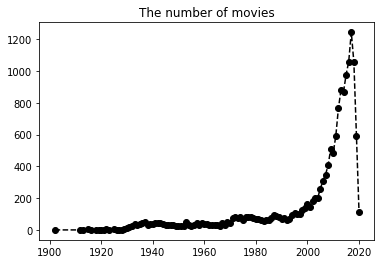

In [17]:
from matplotlib import pyplot as plt
#x  = list(range(len(movie_stats)))
plt.plot(movie_stats.index, movie_stats, 'ko--')
plt.title('The number of movies')
plt.show()

 

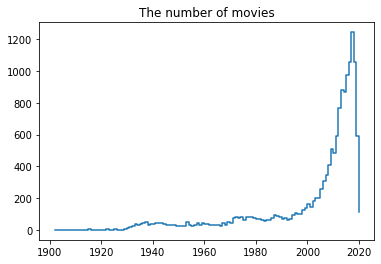

In [18]:
from matplotlib import pyplot as plt
#x  = list(range(len(movie_stats)))
plt.plot(movie_stats.index, movie_stats,drawstyle='steps-post', label='steps-post')
plt.title('The number of movies')
plt.show()

영화와 별점간의 의미가 없음을 발견함(title of movie and IMDb)

In [19]:
movie_stats = df.groupby('Title').agg({'IMDb': [np.size, np.mean]})
movie_stats.tail()

IMDb     
                            size mean
Title                                
Ánima                        1.0  6.5
Æon Flux                     1.0  5.4
Çok Filim Hareketler Bunlar  1.0  4.3
Öldür Beni Sevgilim          1.0  4.5
İncir Reçeli 2               1.0  6.1

다작 감독정보

In [20]:
df.Directors.value_counts()[:25]

Jay Chapman           35
Joseph Kane           30
Cheh Chang            26
Sam Newfield          22
Jim Wynorski          22
David DeCoteau        21
William Beaudine      21
Jay Karas             20
William Witney        17
Scott L. Montoya      17
Fred Olen Ray         16
Mark Atkins           16
Lesley Selander       16
Paul Hoen             15
Marcus Raboy          14
William Nigh          14
Robert N. Bradbury    13
Manny Rodriguez       13
Robert Stevenson      13
Stuart Gillard        12
Chia-Liang Liu        12
Shannon Hartman       12
Ryan Polito           11
Edward L. Cahn        11
Priyadarshan          11
Name: Directors, dtype: int64

영화 랭킹 

In [21]:
df['IMDb'].describe()

count    15233.000000
mean         5.899580
std          1.343047
min          0.000000
25%          5.100000
50%          6.100000
75%          6.900000
max          9.300000
Name: IMDb, dtype: float64

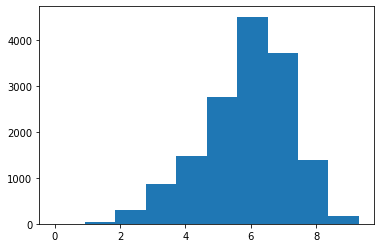

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(df['IMDb'], bins=10)
plt.show()

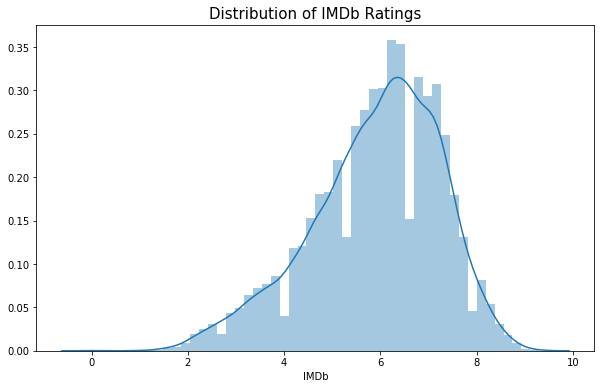

In [23]:
from matplotlib import pyplot as plt
import seaborn as  sns
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Distribution of IMDb Ratings", fontsize=15)
sns.distplot(df['IMDb'])
plt.show()

In [24]:
df[['IMDb','Directors']].groupby('Directors').agg(['mean','count']).sort_values(by=('IMDb','mean'), ascending=False)[:10]

IMDb      
                                mean count
Directors                                 
Miguel Gaudêncio                 9.3     1
Danny Wu                         9.3     1
Rel Dowdell                      9.1     1
Chris Leslie,Oggi Tomic          9.1     1
Paul Kakert                      9.0     1
Tyrone D. Dixon                  8.9     1
François Girard                  8.9     1
Robert Rippberger                8.9     1
Laura Gamse,Jacques de Villiers  8.9     1
Samuel Rich,Gabriella Fritz      8.9     1

In [25]:
directors = df[['IMDb','Directors']].groupby('Directors').agg(['mean','count'])
directors[directors[('IMDb', 'count')] > 5].sort_values(by=('IMDb','mean'), ascending=False)[:10]

IMDb      
                          mean count
Directors                           
Rocco Urbisci         8.460000    10
Hrishikesh Mukherjee  8.071429     7
Martin Scorsese       7.842857     7
Quentin Tarantino     7.816667     6
Stan Lathan           7.633333     6
James Algar           7.442857     7
Pier Paolo Pasolini   7.416667     6
Shannon Hartman       7.391667    12
Rory Kennedy          7.366667     6
Kinji Fukasaku        7.285714     7

상영시간(Running time) 살펴보기

In [26]:
df.Runtime.describe()

count    15233.000000
mean        94.478960
std         24.343577
min          1.000000
25%         84.000000
50%         92.000000
75%        105.000000
max        328.000000
Name: Runtime, dtype: float64

In [27]:
max_runtime = df['Runtime'].nlargest(5)

print(df.nlargest(1, columns='Runtime'))

                     Title  Year  IMDb  Netflix  Hulu  Prime Video  Disney+  \
13048  Custer's Last Stand  1936   4.6        0     0            1        0   

           Directors                                 Genres        Country  \
13048  Elmer Clifton  Adventure,History,Romance,War,Western  United States   

      Language  Runtime  
13048  English    328.0  


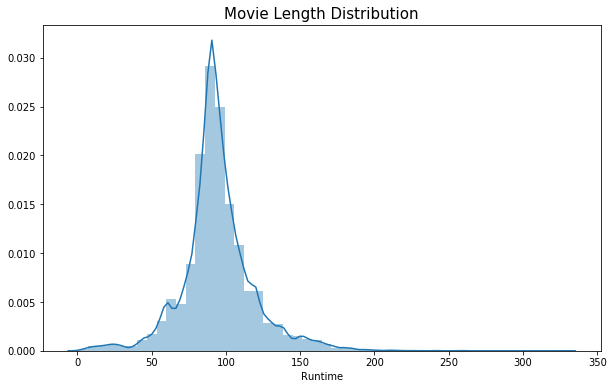

In [28]:
plt.figure(figsize=(10,6))
plt.title("Movie Length Distribution", fontsize=15)
sns.distplot(df.Runtime)
plt.show()

In [29]:
df.query('Runtime > 300 or Runtime < 2')

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
2626,Liefling The Movie,2010,6.3,1,0,0,0,Kendrick Hew,"Short,Thriller",Canada,English,1.0
13048,Custer's Last Stand,1936,4.6,0,0,1,0,Elmer Clifton,"Adventure,History,Romance,War,Western",United States,English,328.0


별점과 상영시간간에는 상관관계가 없음

In [30]:
df[['IMDb','Runtime']].corr()

,IMDb,Runtime
IMDb,1.000000,0.107694
Runtime,0.107694,1.000000
